<a href="https://colab.research.google.com/github/filipoky/my_hw_ds_projects/blob/main/Hw2_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kagglehub

# Імпорт бібліотек
import kagglehub
import pandas as pd

# Завантаження датасету з Kaggle
path = kagglehub.dataset_download("sootersaalu/amazon-top-50-bestselling-books-2009-2019")

print("Path to dataset files:", path)


Path to dataset files: /kaggle/input/amazon-top-50-bestselling-books-2009-2019


In [4]:
df = pd.read_csv(f"{path}/bestsellers with categories.csv")

# Перших 5 рядків
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [18]:
# Розмір

print("Відповідь: датасет зберігає дані про стільки книг:")
print("Shape:", df.shape)

Відповідь: датасет зберігає дані про стільки книг:
Shape: (550, 7)


In [6]:
# Перейменуємо колонки
df.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']
print(df.columns)


Index(['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre'], dtype='object')


In [20]:
# Первинна перевірка

# Пропуски
print("Відповідь: Кількість пропусків:")
print(df.isna().sum())


# Унікальні жанри

print("Відповідь: унікальні жанри:")
print(df['genre'].unique())

Відповідь: Кількість пропусків:
name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64
Відповідь: унікальні жанри:
['Non Fiction' 'Fiction']


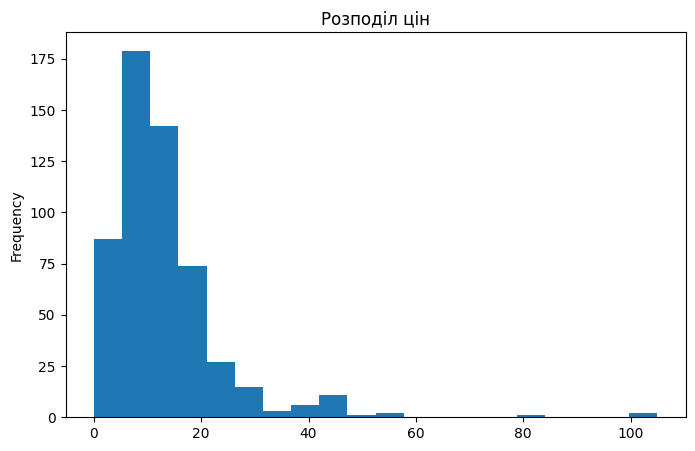

In [8]:
# Діаграма розподілу цін
df['price'].plot(kind='hist', bins=20, figsize=(8, 5), title="Розподіл цін");


In [9]:
# Ціни
print("Max:", df['price'].max())
print("Min:", df['price'].min())
print("Mean:", df['price'].mean())
print("Median:", df['price'].median())


Max: 105
Min: 0
Mean: 13.1
Median: 11.0


In [10]:
# Пошук і сортування

# Найвищий рейтинг
print("Max rating:", df['user_rating'].max())
print("Скільки книг мають цей рейтинг:", df[df['user_rating'] == df['user_rating'].max()].shape[0])

# Найбільше відгуків
print("Книга з найбільшою кількістю відгуків:")
print(df[df['reviews'] == df['reviews'].max()])

# Найдорожча у 2015
df_2015 = df[df['year'] == 2015]
most_expensive_2015 = df_2015[df_2015['price'] == df_2015['price'].max()]
print("Найдорожча книга 2015:")
print(most_expensive_2015)

# Fiction 2010
fiction_2010 = df[(df['year'] == 2010) & (df['genre'] == 'Fiction')]
print("Кількість Fiction у 2010:", fiction_2010.shape[0])

# Рейтинг 4.9 у 2010/2011
high_rating = df[(df['user_rating'] == 4.9) & (df['year'].isin([2010, 2011]))]
print("Кількість книг з рейтингом 4.9 у 2010/2011:", high_rating.shape[0])

# Сортування 2015 дешевше 8
sorted_cheap = df[(df['year'] == 2015) & (df['price'] < 8)].sort_values('price')
print("Остання книга у списку:")
print(sorted_cheap.tail(1))


Max rating: 4.9
Скільки книг мають цей рейтинг: 52
Книга з найбільшою кількістю відгуків:
                        name       author  user_rating  reviews  price  year  \
534  Where the Crawdads Sing  Delia Owens          4.8    87841     15  2019   

       genre  
534  Fiction  
Найдорожча книга 2015:
                                                  name  \
277  Publication Manual of the American Psychologic...   

                                 author  user_rating  reviews  price  year  \
277  American Psychological Association          4.5     8580     46  2015   

           genre  
277  Non Fiction  
Кількість Fiction у 2010: 20
Кількість книг з рейтингом 4.9 у 2010/2011: 1
Остання книга у списку:
                                      name       author  user_rating  reviews  \
253  Old School (Diary of a Wimpy Kid #10)  Jeff Kinney          4.8     6169   

     price  year    genre  
253      7  2015  Fiction  


In [11]:
# Групування

# Макс/мін ціна по жанрах
agg_genre = df.groupby('genre').agg({'price': ['max', 'min']})
print(agg_genre)

# Кількість книг по авторам
author_books = df.groupby('author').agg({'name': 'count'})
print("Shape:", author_books.shape)

# Автор з найбільшою кількістю книг
print("Автор з найбільшою кількістю:", author_books['name'].idxmax())
print("Скільки книг:", author_books['name'].max())

# Середній рейтинг по авторам
author_rating = df.groupby('author').agg({'user_rating': 'mean'})
print("Автор з мінімальним рейтингом:", author_rating['user_rating'].idxmin())
print("Його середній рейтинг:", author_rating['user_rating'].min())

# З'єднання
result = pd.concat([author_books, author_rating], axis=1)
result = result.rename(columns={'name': 'books_count', 'user_rating': 'avg_rating'})
result = result.sort_values(['books_count', 'avg_rating'])
print(result.head(1))


            price    
              max min
genre                
Fiction        82   0
Non Fiction   105   0
Shape: (248, 1)
Автор з найбільшою кількістю: Jeff Kinney
Скільки книг: 12
Автор з мінімальним рейтингом: Donna Tartt
Його середній рейтинг: 3.9
                books_count  avg_rating
author                                 
Muriel Barbery            1         4.0


In [12]:
# Збереження
result.to_csv("authors_stats.csv")


In [13]:
from google.colab import files
files.download('authors_stats.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

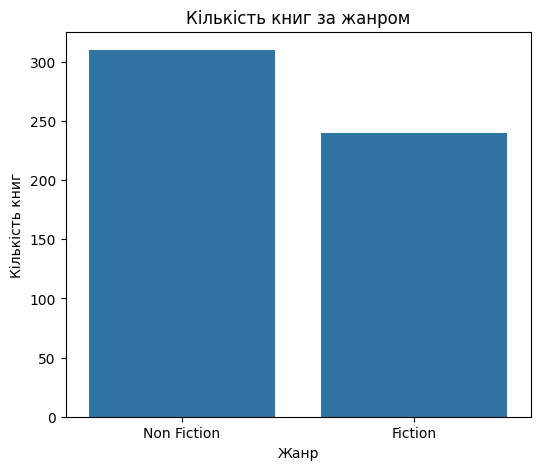

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.countplot(x='genre', data=df)
plt.title("Кількість книг за жанром")
plt.xlabel("Жанр")
plt.ylabel("Кількість книг")
plt.show()


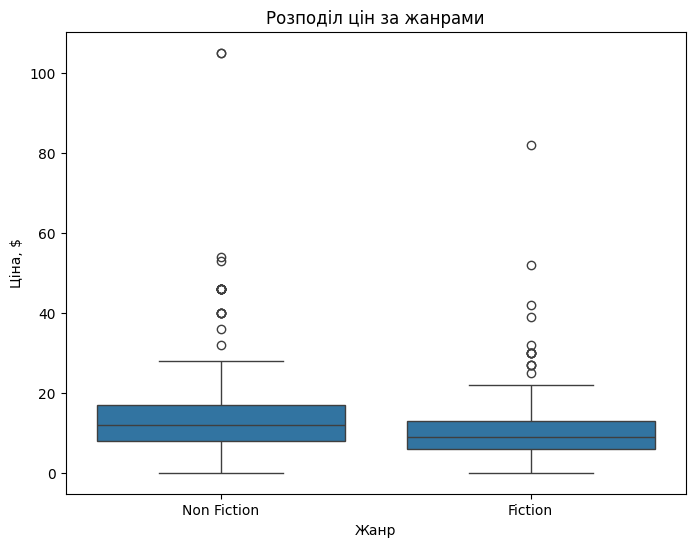

In [15]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='genre', y='price', data=df)
plt.title("Розподіл цін за жанрами")
plt.xlabel("Жанр")
plt.ylabel("Ціна, $")
plt.show()


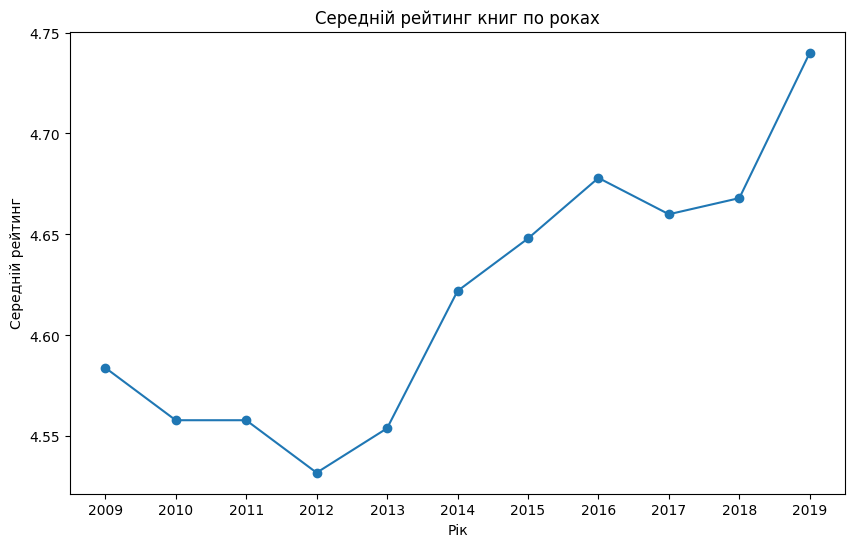

In [17]:
plt.figure(figsize=(10, 6))
df.groupby('year')['user_rating'].mean().plot(kind='line', marker='o')
plt.title("Середній рейтинг книг по роках")
plt.xlabel("Рік")
plt.ylabel("Середній рейтинг")
plt.xticks(df['year'].unique())
plt.show()
